<a href="https://colab.research.google.com/github/rahulvenkat207/Linear-Algebra-CodingWay/blob/main/Diagonalization/Diagonalization_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

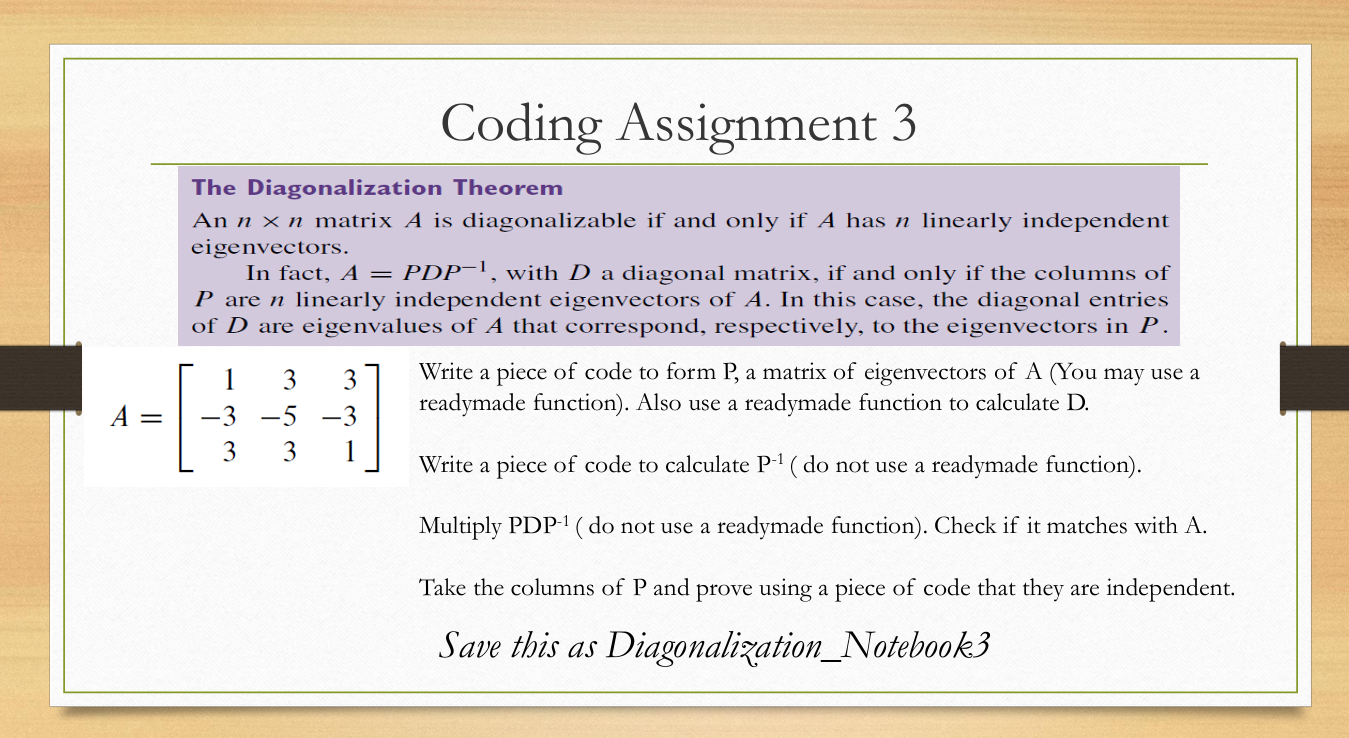

In [69]:
from IPython.display import display, Image

# Specify the path to the image file
image_path = "/content/Screenshot 2024-05-17 234425.png"

# Display the image
display(Image(filename=image_path))

# Importing Libraries

In [68]:
import numpy as np
import sympy as sp

# Given matrix A

In [70]:
A = np.array([[1, 3, 3], [-3, -5, -3], [3, 3, 1]])
A

array([[ 1,  3,  3],
       [-3, -5, -3],
       [ 3,  3,  1]])

# Calculate eigenvalues and eigenvectors of A

In [79]:

eigenvalues, eigenvectors = np.linalg.eig(A)

# Form matrix P of eigenvectors
P = eigenvectors


print(eigenvalues)
print(P)

[ 1. -2. -2.]
[[ 5.77350269e-01 -1.28197512e-16 -6.72654054e-01]
 [-5.77350269e-01 -7.07106781e-01  7.37141689e-01]
 [ 5.77350269e-01  7.07106781e-01 -6.44876349e-02]]


# Form diagonal matrix D using eigenvalues

In [50]:
D = np.diag(eigenvalues)
print(D)

[[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]


# Reusing tha same code that we have used in EigenValueVectors_Notebook3 for calculating Inverse

In [51]:
def inverse_matrix(matrix):
    n = len(matrix)

    augmented_matrix = np.hstack([matrix, np.eye(n)])

    for i in range(n):
        pivot = augmented_matrix[i, i]
        if pivot == 0:
            # If the pivot is 0, swap with a row below to avoid division by 0
            for j in range(i+1, n):
                if augmented_matrix[j, i] != 0:
                    augmented_matrix[[i, j]] = augmented_matrix[[j, i]]
                    break
            pivot = augmented_matrix[i, i]
            if pivot == 0:
                raise ValueError("Matrix is singular and cannot be inverted.")
        augmented_matrix[i] /= pivot
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]

    inverse = augmented_matrix[:, n:]

    return inverse

In [52]:
P_inv = inverse_matrix(P)
P_inv

array([[ 1.73205081,  1.73205081,  1.73205081],
       [-1.41421356, -1.2786323 ,  0.13558127],
       [ 0.        ,  1.48664829,  1.48664829]])

# Reusing tha same code that we have used in EigenValueVectors_Notebook3 for matrix multiplication

In [53]:
def matrix_mul(matrix1, matrix2):
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            # Calculate dot product of row i from matrix1 and column j from matrix2
            dot_product = sum(matrix1[i][k] * matrix2[k][j] for k in range(len(matrix2)))
            row.append(dot_product)
        result.append(row)
    return result

# Calculate PDP_inv

In [66]:
PD = matrix_mul(P,D)
PDP_inv = matrix_mul(PD,P_inv)



In [67]:
PDP_inv

[[0.9999999999999994, 2.9999999999999996, 3.0],
 [-2.999999999999999, -4.999999999999999, -2.9999999999999996],
 [2.999999999999999, 2.9999999999999996, 0.9999999999999999]]

In [63]:
A

array([[ 1,  3,  3],
       [-3, -5, -3],
       [ 3,  3,  1]])

# Check if PDP_inv matches with A

In [56]:
if np.allclose(PDP_inv, A):
    print("PDP_inv matches with A")
else:
    print("PDP_inv does not match with A")

PDP_inv matches with A


In [86]:
formatted_P = [[format(float(num), '.2f') for num in row] for row in P]

# Print the formatted array
for row in formatted_P:
    print(row)

['0.58', '-0.00', '-0.67']
['-0.58', '-0.71', '0.74']
['0.58', '0.71', '-0.06']


In [81]:
# Convert M to a SymPy Matrix
M_sympy = sp.Matrix(P)

# Reduce M to its Reduced Row Echelon Form (RREF)
RREF, pivot_columns = M_sympy.rref()
print("\nReduced Row Echelon Form (RREF) of P:")
print(RREF)



Reduced Row Echelon Form (RREF) of P:
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


The presence of pivot positions in every column of the RREF indicates that the columns of
P are linearly independent.